In [1]:
import gym
import pickle
import imageEnv
import numpy as np
import torch
from imageEnv.perceptionFields import SimplePerceptionField
import cv2
import torchvision.datasets as dset
import torchvision.transforms as transforms
import pycocotools
import pickle
from PIL import Image


from IPython.display import clear_output, display
import matplotlib.pyplot as plt

In [2]:
env = gym.make('ImageEnv-v0')

In [3]:
cap = dset.CocoDetection(root = 'data/coco/val2017',
                        annFile = 'data/coco/annotations/instances_val2017.json',
                        transform=transforms.ToTensor())


loading annotations into memory...
Done (t=0.63s)
creating index...
index created!


In [58]:
images = []
masks = []

for idx, el in enumerate(cap):
    clear_output(wait=True)
    display("preparing image {}".format(idx))
    image, target = el
    categoryMask = np.zeros_like(image[0])
    hasCategory = False
    for instance in target:
        if instance['category_id'] == 1:
            hasCategory = True
            mask = cap.coco.annToMask(instance)
            categoryMask += mask
            
    if hasCategory == True:
        categoryMask = np.clip(categoryMask,0.0,1.0)
        images.append(image.permute(1, 2, 0).numpy())
        masks.append(categoryMask)

'preparing image 4999'

In [59]:
for i, image in enumerate(images):
    targetImage = (image * 255).astype(np.uint8)
    out = Image.fromarray(targetImage)
    out.save("data/input/images/"+str(i)+".jpg")
    
for i, mask in enumerate(masks):
    targetMask = (mask * 255).astype(np.uint8)
    out = Image.fromarray(targetMask)
    out.save("data/input/masks/"+str(i)+".jpg")

In [71]:
img = cv2.imread("data/input/masks/2.jpg")

In [75]:
cv2.imshow("img",img)

In [3]:
np.random.rand(2)*4

array([2.88816086, 3.6932766 ])

In [8]:
'{0:05d}'.format(1)

'00001'

In [56]:
path = "data/DAVIS/Annotations/Full-Resolution/bear/00001.png"

In [88]:
mask = cv2.imread(path)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask = mask*255
mask = np.clip(mask, 0, 255)
mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
mask = np.transpose(mask,(2,1,0))

In [85]:


#mask = np.transpose(mask,(2,1,0))

In [86]:
mask.shape

(1080, 1920, 3)

In [80]:
np.max(mask[2])

0

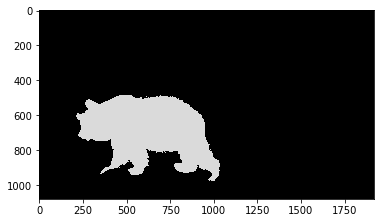

In [89]:
plt.imshow(mask)